In [1]:
import pandas as pd

In [2]:
ss = pd.read_csv('Assignment 3 Sentiment Scores.csv')

In [3]:
ss.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [4]:
senti = ss.copy()

In [5]:
for i in range(len(ss.columns)):
    for ii in range(i+1,len(ss.columns)):
            temp = ss.columns[i] +'_'+ss.columns[ii]
            senti[temp]=ss[ss.columns[i]]-ss[ss.columns[ii]]

In [6]:
senti[:5]

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass,...,3series_5series,3series_7series,3series_XJ,3series_Sclass,5series_7series,5series_XJ,5series_Sclass,7series_XJ,7series_Sclass,XJ_Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,0.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN


In [7]:
import numpy as np
import re

use = []
for q in senti.columns[10:]:
    #qq = sum(senti[q].dropna())/(len(senti[q]) - senti[q].count(None))
    p1,p2 = re.split('_',q)
    neg = (senti[q]<0)
    neg_sent  = senti[q][neg].sum()/senti[q][neg].count()
    pos = (senti[q]>0)
    pos_sent  = senti[q][pos].sum()/senti[q][pos].count()
    use.append((p1,p2,pos_sent,neg_sent))

In [8]:
use[:10]

[('ES', 'LS', 1.1666666666666667, -2.0),
 ('ES', 'RX', 1.6666666666666667, -2.0),
 ('ES', 'A8', 3.4, -3.0),
 ('ES', 'A6', 6.0, -1.6666666666666667),
 ('ES', '3series', 3.25, -6.0),
 ('ES', '5series', 4.0, -5.0),
 ('ES', '7series', 3.6, -2.8),
 ('ES', 'XJ', 1.0, -1.0),
 ('ES', 'Sclass', 3.2857142857142856, -2.6153846153846154),
 ('LS', 'RX', 3.4, -1.1428571428571428)]

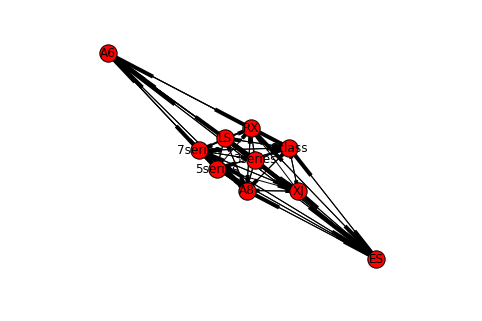

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

G = nx.DiGraph()

G.add_nodes_from(ss.columns)

for a,b,c,d in use:
    if c!=0 :
        G.add_edge(b,a,{'weight':c})
    if d!=0:
        G.add_edge(a,b,{'weight':abs(d)})
        
plt.figure()
nx.draw(G, with_labels=True)
plt.show()

## Q2

In [10]:
pr = nx.pagerank(G, alpha=0.85,weight='weight')
pr

{'3series': 0.13597392541734463,
 '5series': 0.08844760203403688,
 '7series': 0.10100269095219229,
 'A6': 0.07129678684991539,
 'A8': 0.0986064568886881,
 'ES': 0.1093078176978172,
 'LS': 0.11135565657040597,
 'RX': 0.10551334503607714,
 'Sclass': 0.10370503165602211,
 'XJ': 0.0747906868975003}

In [11]:
pr_df = pd.DataFrame.from_dict(pr,orient='index')
pr_df = pr_df.reset_index()
pr_df.columns=['Model','pr']
cs = pd.read_csv('car_sales.csv')
cs = pd.merge(pr_df, cs, left_index=True, right_index=True, how='outer')
cs

,Model_x,pr,Model_y,Sales
0,XJ,0.074791,Jaguar XJ,6600
1,7series,0.101003,Mercedes S-class,25000
2,Sclass,0.103705,BMW 7-series,14000
3,RX,0.105513,Lexus RX,120000
4,LS,0.111356,Lexus LS,30000
5,A6,0.071297,Audi A6,20000
6,A8,0.098606,Audi A8,12000
7,3series,0.135974,BMW 3-series,220000
8,ES,0.109308,Lexus ES,135000
9,5series,0.088448,BMW 5-series,60000


In [14]:
import scipy

print cs.corr()
scipy.stats.spearmanr(cs['pr'], cs['Sales'])

             pr     Sales
pr     1.000000  0.733949
Sales  0.733949  1.000000


SpearmanrResult(correlation=0.69696969696969691, pvalue=0.025096675882251829)

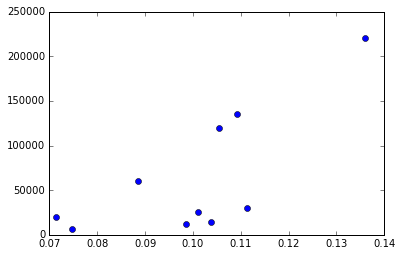

In [15]:
plt.plot(cs['pr'], cs['Sales'], marker='o', linestyle='')

## Q3

In [16]:
# Import
reviews = pd.read_csv('Assignment 3 Edmunds Posts.csv')

# Convert to list
reviews = reviews["Posts"].tolist()

# Remove unwanted punctuations
for i in range(len(reviews)):
    #reviews[i] = re.sub(r'[^\w\s]',' ',reviews[i])
    reviews[i] = re.sub(r"[^\w\d']+",' ',reviews[i]) #remove everything except digit,letter,apostrophe
    reviews[i] = reviews[i].lower()
    #reviews[i] = re.sub(r'\s\s',' ',reviews[i]) #removes double whitespace
    
reviews[:3]

# t change - lexusES, index range

[" as a mercedes fan i was sad but i knew that those were not typical situations you're absolutely right take my previous '01 sclass this was pre '03 refresh the very model that cr calls the worst buy in the last decade well the only problem i had was the usual comand failure that everyone experienced and one hid bulb 41 000 miles of everyday driving and that was it no abc air suspension failures a c problems no electrical grimlins much unlike my '98 ls noda and to my '05 s65 amg two new rear tires was all the maintenance it required for 10 000 miles of onwership of course the usual oil lube and other mb amg stuff but nothing out of the scheduled maintenance and the tires were due to my over zealous driving habits so many people jump the gun about mb's and bimmers being hugely unreliable take for instance porsche 10 years ago it was thought to be nothing more than a weekend toy because of what people assumed to be unreliable now it's the most reliable company in the biz hands down desp

In [17]:
# Creating list of models
car_models = ['xj','sclass','s class','7 series','7series','rx','ls','a6','a8','3 series','3series','es','5 series','5series']

# Remove stopwords


# Checking to see if reviews have them
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

temp = []
review_temp = []
parsed = []

for m in range(len(reviews)-221):
    tokenized = nltk.word_tokenize(reviews[m])
    tokenized = [word for word in tokenized if word not in stopwords.words('english')]
    for i,j in enumerate(tokenized):
        lmtzr = WordNetLemmatizer()
        lmtzr.lemmatize(j)
        if j in car_models:
            temp.extend([tokenized[i-2],tokenized[i-1],tokenized[i],tokenized[i+1],tokenized[i+2]])
            temp = " ".join(temp)
            car_tup = [temp,tokenized[i]]
            review_temp.append(car_tup)
            temp = []
    if review_temp:
        parsed.append(review_temp)
    review_temp = []

parsed

[[["previous '01 sclass pre '03", 'sclass'],
  ["unlike '98 ls noda '05", 'ls'],
  ['one issue a8 w12 yes', 'a8'],
  ["two japanese ls 's 've", 'ls']],
 [['price difference a8 lexusls price', 'a8'],
  ['sales especially sclass 7series a8', 'sclass'],
  ['especially sclass 7series a8 especially', '7series'],
  ['sclass 7series a8 especially swb', 'a8'],
  ['price either 7series course many', '7series'],
  ["many factors a8 n't sell", 'a8'],
  ['lexusls even sclass 7series audi', 'sclass'],
  ["even sclass 7series audi 's", '7series'],
  ['scared hear a8 made aluminum', 'a8']],
 [['second part rx incredibly well', 'rx']],
 [['extensions lexuses rx mainstream cars', 'rx'],
  ['cars lexuses rx competed 325', 'rx'],
  ['gs competed 3series 530i 545i', '3series'],
  ['headed much sclass sales worldwide', 'sclass'],
  ['build mercedes sclass according necessarily', 'sclass'],
  ['according necessarily 7series point anyone', '7series'],
  ['anyone make sclass except mb', 'sclass']],
 [['herita

In [21]:
from textblob import TextBlob

for i,j in enumerate(parsed):
    for a,b in enumerate(j):
        blob = TextBlob(b[0])
        b[0] = blob.sentiment.polarity
            
parsed

[[[-0.16666666666666666, 'sclass'], [0.0, 'ls'], [0.0, 'a8'], [0.0, 'ls']],
 [[0.0, 'a8'],
  [0.0, 'sclass'],
  [0.0, '7series'],
  [0.0, 'a8'],
  [0.5, '7series'],
  [0.5, 'a8'],
  [0.0, 'sclass'],
  [0.0, '7series'],
  [0.0, 'a8']],
 [[0.45, 'rx']],
 [[0.0, 'rx'],
  [0.0, 'rx'],
  [0.0, '3series'],
  [0.2, 'sclass'],
  [0.0, 'sclass'],
  [0.0, '7series'],
  [0.0, 'sclass']],
 [[0.5, 'sclass']],
 [[0.0, 'sclass'],
  [0.0, 'sclass'],
  [0.0, 'rx'],
  [0.0, 'sclass'],
  [0.0, 'sclass'],
  [0.0, 'sclass']],
 [[0.0, 'a8'], [0.0, 'a8']],
 [[0.13636363636363635, 'a8']]]

In [ ]:
#Create a cooccurence matrix - com which contains words within the bigrams + words adjacent to it - +-1
com = defaultdict(lambda : defaultdict(int))
for i in range(len(car_models[:1000])):
    for m in range(len(extracted_words[i])):
            a = []
            for b in nltk.bigrams(yrs[i]):
                a.append((b[0]+" "+b[1]))
            index_word = a.index(extracted_words[i][m])
            for j in range(max(0,index_word-1),min(len(yrs[i]),index_word+3)):
                w1, w2 = [extracted_words[i][m], yrs[i][j]] 
                com[w1][w2] += 1

In [25]:
b = parsed[0][0]
print b

for l in range(5):
    print l

[-0.16666666666666666, 'sclass']


In [ ]:
blah = parsed

for i,j in enumerate(blah):
    for a,b in enumerate(j):
        for l,m in enumerate(b):
                if m[l] == m:
                    b[0] += val